As part of any machine learning, data visualization plays an important role in learning more about the available data and in identifying any major patterns.

Here we will cover some important techniques that could help us meet the challenges of data visualization for machine learning, such as parallel coordinate plots, summary data tables, drawing ANN charts and many more.

### Data Preparation
Before getting into data visualization, let’s prepare our data. We will start by importing some necessary libraries that we will need in the process:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
# !pip install sklearn-pandas==1.8.0

Now, we will prepare the data by identifying and removing the missing values, and then we will create a new data frame so that we can easily continue with data visualization.

In [17]:
df = pd.read_csv('vgsales.csv')

In [18]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_values

column_name  percent_missing
Rank                  Rank         0.000000
Name                  Name         0.000000
Platform          Platform         0.000000
Year                  Year         1.632727
Genre                Genre         0.000000
Publisher        Publisher         0.349440
NA_Sales          NA_Sales         0.000000
EU_Sales          EU_Sales         0.000000
JP_Sales          JP_Sales         0.000000
Other_Sales    Other_Sales         0.000000
Global_Sales  Global_Sales         0.000000

In [19]:
labels = df['Genre']
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [8]:
from sklearn_pandas import CategoricalImputer

In [20]:
imputer = CategoricalImputer()

df['Year'] = imputer.fit_transform(df['Year'].values)
df['Publisher'] = imputer.fit_transform(df['Publisher'].values)

percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})

missing_values

column_name  percent_missing
Rank                  Rank              0.0
Name                  Name              0.0
Platform          Platform              0.0
Year                  Year              0.0
Genre                Genre              0.0
Publisher        Publisher              0.0
NA_Sales          NA_Sales              0.0
EU_Sales          EU_Sales              0.0
JP_Sales          JP_Sales              0.0
Other_Sales    Other_Sales              0.0
Global_Sales  Global_Sales              0.0

In [10]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})

In [21]:
df = df.drop(['Rank', 'Year'], axis=1)
df = df.apply(preprocessing.LabelEncoder().fit_transform)
enc_labels = df['Genre']

df = pd.get_dummies(df)
df.head()

Name  Platform  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
0  11007        26     10        359       408       304       220   
1   9327        11      4        359       407       260       241   
2   5573        26      6        359       404       303       221   
3  11009        26     10        359       403       302       213   
4   7346         5      7        359       397       296       243   

   Other_Sales  Global_Sales  
0          155           622  
1           77           621  
2          152           620  
3          151           619  
4           96           618

In [22]:
labels.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [23]:
plt.rcParams['legend.fontsize'] = '16'

In [25]:
df2 = df.drop(['Genre'], axis=1)
df2['Genre'] = labels

In [24]:
from pandas.plotting import parallel_coordinates

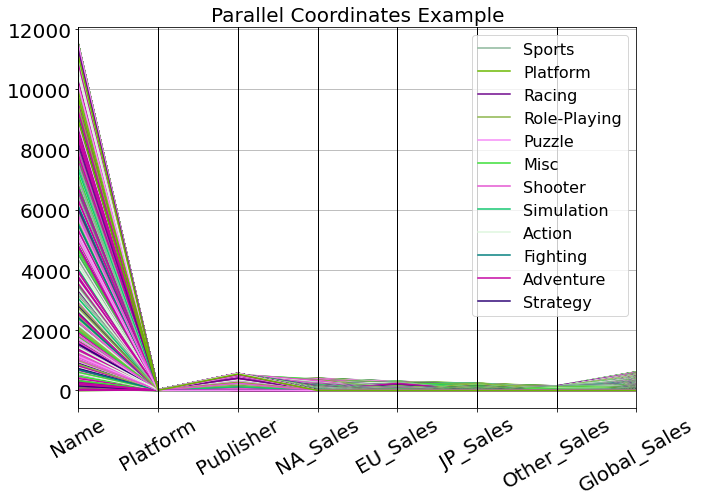

In [26]:
#df.plot(figsize=(10,10), fontsize=24)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

ax.set_title("Parallel Coordinates Example", fontsize=20)
ax.tick_params(axis='x', rotation=30)
ax.tick_params(axis='both', labelsize=20)

parallel_coordinates(df2, class_column='Genre', ax=ax)

plt.show()

Now our data is ready to be used for data visualization for machine learning.

### Techniques of Data Visualization for Machine Learning

###### Hyperparameter Optimization:
One of the most common activities in machine learning is hyperparameter optimization. Tuning machine learning models is one type of optimization problem. We have a set of hyperparameters and we are looking to find the right combination of their values that can help us find the minimum or the maximum of a function.

One of the best solutions for this type of task is to use a parallel coordinate plot. By using this type of graph, we can easily compare different variables together to discover possible relationships.

In the case of hyperparameter optimization, this can be used as a simple tool to inspect which combination of parameters can give us the highest test accuracy. Another possible use of parallel coordinate plots in data analysis is to inspect relationships in values between different entities in a data frame:

In [27]:
X = df.drop(['Genre'], axis=1)
y = df['Genre']
scaler = StandardScaler().fit(X)
X2 = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

### Yellowbrick

In [28]:
# Specify the features of interest and the classes of the target
features = list(X.columns)
classes = list(labels.unique())

In [31]:
# !pip install yellowbrick

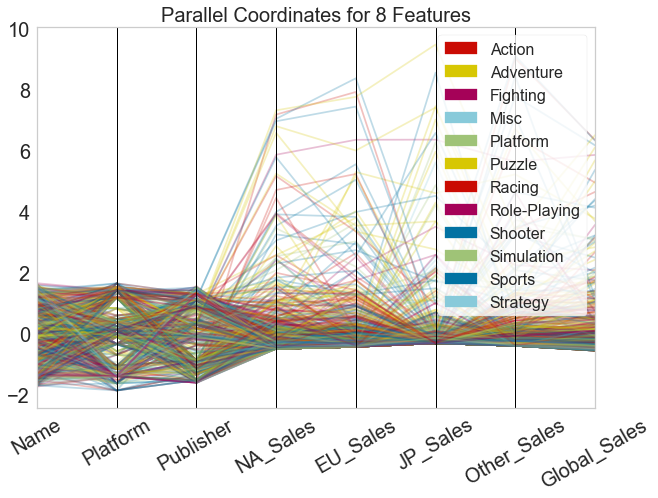

In [33]:
from yellowbrick.features import ParallelCoordinates
# Fit the visualizer and display it
plt.rcParams['legend.fontsize'] = '16'
plt.rcParams['axes.titlesize'] = '20'
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.tick_params(axis='x', rotation=30)
ax.tick_params(axis='both', labelsize=20)

# Instantiate the visualizer
visualizer = ParallelCoordinates(ax=ax,
    classes=classes, features=features,
    normalize='standard', sample=0.05, shuffle=True
)

visualizer.fit_transform(X, labels)
visualizer.show(fontsize=20)

plt.show()

In [34]:
clf = RandomForestClassifier(max_depth=5)
clf.fit(X_train, y_train)
predictionforest = clf.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[859  85   0  37   0   0   0  57   0   0  62   1]
 [180 174   0  18   0   0   0  39   0   0  17   1]
 [194  27   0   2   0   0   0  42   0   0  22   0]
 [321  68   0  56   0   1   0  65   0   0  58   1]
 [233   8   0   5   1   1   0  24   0   0  16   1]
 [107   8   0  22   0   0   0  30   0   0  18   0]
 [327   9   0   8   0   0   0   9   0   0  62   0]
 [244  70   0   5   0   0   0 150   0   0  15   0]
 [345  15   0   7   0   0   0  12  11   0  33   2]
 [145  31   0  36   0   1   0  27   0   0  34   4]
 [396  28   0  19   0   1   0  36   0   0 312   1]
 [139  23   0   3   0   0   0  42   0   0  12   3]]
              precision    recall  f1-score   support

           0       0.25      0.78      0.37      1101
           1       0.32      0.41      0.36       429
           2       0.00      0.00      0.00       287
           3       0.26      0.10      0.14       570
           4       1.00      0.00      0.01       289
           5       0.00      0.00      0.00       185
        

C:\Users\Waqas.Ali\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Waqas.Ali\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Waqas.Ali\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'max_leaf_nodes': list(np.linspace(10, 120, 10, dtype = int)),
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int)),
                 'bootstrap': [True, False]
                }

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 7, 
                               cv = 2, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 2 folds for each of 7 candidates, totalling 14 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=7,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_leaf_nodes': [10, 22, 34, 46, 58,
                                                           71, 83, 95, 107,
                                                           120],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
              

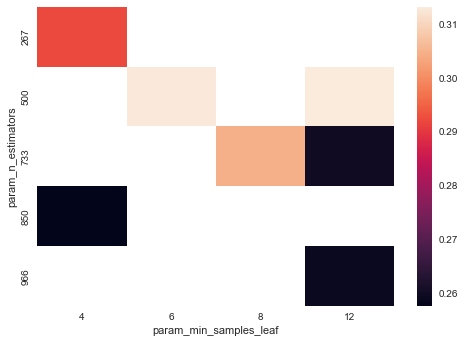

In [37]:
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', columns='param_min_samples_leaf')
     
sns.heatmap(table)

plt.show()

In [38]:
predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[801  71   0  59   2   0   0  51  10   0  89  18]
 [156 163   0  26   1   0   0  45   1   2  21  14]
 [156  25   9   7   2   0   0  49   0   0  39   0]
 [235  63   0 126   4   0   0  70   6   3  57   6]
 [194   8   0  14  26   0   0  23   1   1  20   2]
 [ 98   7   0  32   1   0   1  30   0   0  14   2]
 [262   8   0  15   2   0  20  14   5   1  83   5]
 [175  55   0  13   2   0   1 199   7   2  21   9]
 [291  15   0   9   2   0   1  16  40   0  40  11]
 [106  29   0  39   0   1   0  30   1  26  31  15]
 [263  22   1  36   6   0   0  40   3   3 412   7]
 [100  19   0  10   0   0   0  43   4   1  18  27]]
              precision    recall  f1-score   support

           0       0.28      0.73      0.41      1101
           1       0.34      0.38      0.36       429
           2       0.90      0.03      0.06       287
           3       0.33      0.22      0.26       570
           4       0.54      0.09      0.15       289
           5       0.00      0.00      0.00       185
        

In [39]:
df2 = pd.DataFrame(model.cv_results_)
df2.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.277738      0.030504         0.560636        0.007997   
1       6.958102      0.039129         1.297128        0.007158   
2       7.703946      0.074005         1.500137        0.007008   
3       9.047907      0.099555         2.064539        0.031897   
4       7.151796      0.003163         1.093730        0.008634   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                267                       7                      4   
1                733                      10                     12   
2                850                       5                      4   
3                733                       7                      8   
4                500                       5                      6   

  param_max_leaf_nodes param_max_depth param_bootstrap  \
0                   34              10           False   
1                   10              10           False   
2                   10             671            True   
3                   71             406            True   
4                   95             935            True   

                                              params  split0_test_score  \
0  {'n_estimators': 267, 'min_samples_split': 7, ...           0.297302   
1  {'n_estimators': 733, 'min_samples_split': 10,...           0.260252   
2  {'n_estimators': 850, 'min_samples_split': 5, ...           0.255755   
3  {'n_estimators': 733, 'min_samples_split': 7, ...           0.309173   
4  {'n_estimators': 500, 'min_samples_split': 5, ...           0.314568   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.286691         0.291996        0.005306                4  
1           0.259532         0.259892        0.000360                5  
2           0.259353         0.257554        0.001799                7  
3           0.300180         0.304676        0.004496                3  
4           0.311331         0.312950        0.001619                2

In [40]:
enc_bootstrap = preprocessing.LabelEncoder().fit_transform(df2['param_bootstrap'])
df2 = df2.drop(['params', 'param_bootstrap'], axis=1)
df2['param_bootstrap'] = enc_bootstrap
df2['mean_test_score'] = df2['mean_test_score']*100
df2 = df2[['param_bootstrap', 'param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_leaf_nodes',
           'param_max_depth', 'mean_test_score']].astype(int)

In [41]:
df2['mean_test_score']

0    29
1    25
2    25
3    30
4    31
5    31
6    25
Name: mean_test_score, dtype: int32

### Custom Matplotlib

In [42]:
# From: https://stackoverflow.com/questions/23547347/parallel-coordinates-plot-for-continous-data-in-pandas
def parallel_coordinates2(frame, class_column, cols=None, ax=None, color=None,
                     use_columns=False, xticks=None, colormap=None,
                     **kwds):

    n = len(frame)
    class_col = frame[class_column]
    class_min = np.amin(class_col)
    class_max = np.amax(class_col)

    if cols is None:
        df = frame.drop(class_column, axis=1)
    else:
        df = frame[cols]

    used_legends = set([])

    ncols = len(df.columns)

    # determine values to use for xticks
    if use_columns is True:
        if not np.all(np.isreal(list(df.columns))):
            raise ValueError('Columns must be numeric to be used as xticks')
        x = df.columns
    elif xticks is not None:
        if not np.all(np.isreal(xticks)):
            raise ValueError('xticks specified must be numeric')
        elif len(xticks) != ncols:
            raise ValueError('Length of xticks must match number of columns')
        x = xticks
    else:
        x = range(ncols)

    fig = plt.figure(figsize=(18,7))
    ax = fig.add_subplot(111)

    Colorm = plt.get_cmap(colormap)

    for i in range(n):
        y = df.iloc[i].values
        kls = class_col.iat[i]
        ax.plot(x, y, color=Colorm((kls - class_min)/(class_max-class_min)), 
                alpha=(kls - class_min)/(class_max-class_min), **kwds)

    for i in x:
        ax.axvline(i, linewidth=1, color='black')

    ax.set_xticks(x)
    ax.set_xticklabels(df.columns)
    ax.set_xlim(x[0], x[-1])
    ax.set_title("Parallel Coordinates Example", fontsize=20)
    ax.tick_params(axis='x', rotation=30)
    ax.tick_params(axis='both', labelsize=20)
    ax.grid(False)

    bounds = np.linspace(class_min,class_max,10)
    cax,_ = mpl.colorbar.make_axes(ax)
    cb = mpl.colorbar.ColorbarBase(cax, cmap=Colorm, spacing='proportional', ticks=bounds, 
                                   boundaries=bounds, format='%.2f')

    return fig

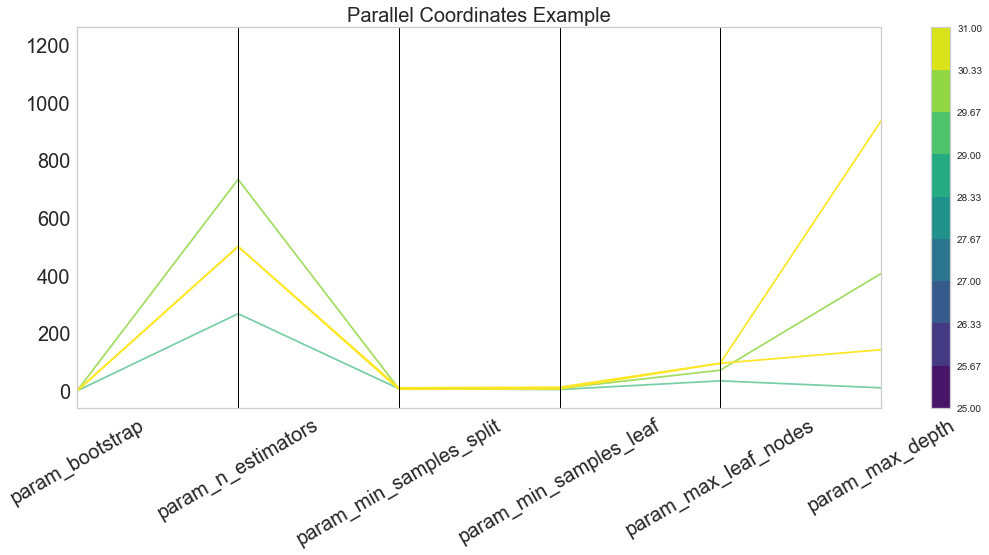

In [43]:
fig = parallel_coordinates2(df2, class_column='mean_test_score',  colormap="viridis")

### Plotly

In [45]:
# !pip install chart-studio

In [46]:
import chart_studio
chart_studio.tools.set_credentials_file(username='TODO', api_key='TODO')

In [47]:
import plotly.express as px
import chart_studio.plotly as py

fig = px.parallel_coordinates(df2, color="mean_test_score", 
                             labels=dict(zip(list(df2.columns), 
                                             list(['_'.join(i.split('_')[1:]) for i in df2.columns]))),
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=27)
#py.plot(fig, filename = 'Parallel Coordinates', auto_open=True)
fig.show()

In [48]:
fig = px.parallel_coordinates(df, color="Genre", 
                             labels=list(df.columns),
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=27)
fig.show()

### Data Wrapper

In [62]:
# !pip install datawrapper --user

In [63]:
# from datawrapper import Datawrapper
# dw = Datawrapper(access_token = "TODO")

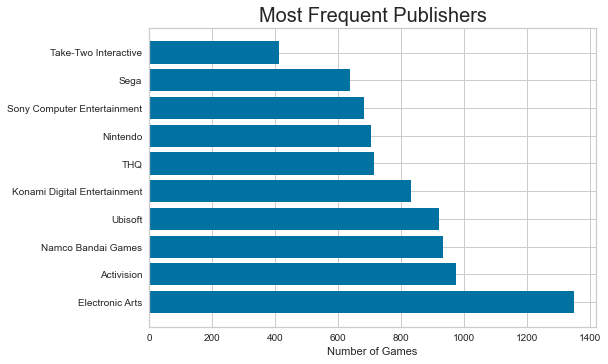

In [55]:
df3 = pd.read_csv('vgsales.csv')
#df3.head()
plt.barh(df3['Publisher'].value_counts().index[:10], df3['Publisher'].value_counts().values[:10])
plt.title("Most Frequent Publishers")
plt.xlabel("Number of Games");

In [56]:
res = {'Publisher Name': df3['Publisher'].value_counts().index[:10], 'Occurrences': df3['Publisher'].value_counts().values[:10]}
res = pd.DataFrame(data=res)

In [64]:
# games_chart = dw.create_chart(title = "Most Frequent Game Publishers", chart_type = 'd3-bars', data = res)

In [65]:
# dw.update_description(
#     games_chart['id'],
#     source_name = 'Video Game Sales',
#     source_url = 'https://www.kaggle.com/gregorut/videogamesales',
#     byline = 'Pier Paolo Ippolito',
# )

In [66]:
from IPython.display import IFrame

# dw.publish_chart(games_chart['id'])

In [67]:
from IPython.display import HTML

HTML('<iframe title="Most Frequent Game Publishers" aria-label="Bar Chart" id="datawrapper-chart-YEUFF" src="https://datawrapper.dwcdn.net/YEUFF/1/" scrolling="no" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="undefined"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(a){if(void 0!==a.data["datawrapper-height"])for(var e in a.data["datawrapper-height"]){var t=document.getElementById("datawrapper-chart-"+e)||document.querySelector("iframe[src*='"+e+"']");t&&(t.style.height=a.data["datawrapper-height"][e]+"px")}}))}();</script>')


Alternatively, it could be possible to use [Weights & Biases Sweeps](https://www.wandb.com/articles/hyperparameter-tuning-as-easy-as-1-2-3)

### Plotly Prediction Table:

When working with time-series data in machine learning, sometimes it can be really handy to be able to quickly understand which data points our model is performing poorly, to try and understand the limitations it might face.

One possible approach is to create a summary table with actual and predicted values and some form of metric summarizing how well a data point has been predicted. Using Plotly, this can be easily done by creating a plot function:

In [68]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly

In [69]:
def predreport(y_pred, Y_Test):
    diff = y_pred.flatten() - Y_Test.flatten()
    perc = (abs(diff)/y_pred.flatten())*100
    priority = []
    for i in perc:
        if i > 0.4:
            priority.append(3)
        elif i> 0.1:
            priority.append(2)
        else:
            priority.append(1)
    print("Error Importance 1 reported in ", priority.count(1),
          "cases\n")
    print("Error Importance 2 reported in", priority.count(2), 
          "cases\n")                                 
    print("Error Importance 3 reported in ", priority.count(3),    
          "cases\n")
    colors = ['rgb(102, 153, 255)','rgb(0, 255, 0)', 
              'rgb(255, 153, 51)', 'rgb(255, 51, 0)']
    fig = go.Figure(data=[go.Table(header=
                    dict(
                        values=['Actual Values', 'Predictions', 
                        '% Difference', "Error Importance"],
                        line_color=[np.array(colors)[0]],
                        fill_color=[np.array(colors)[0]],
                                    align='left'),
                    cells=dict(
                       values=[y_pred.flatten(),Y_Test.flatten(),
                               perc, priority], 
                       line_color=[np.array(colors)[priority]],
                       fill_color=[np.array(colors)[priority]],  
                                    align='left'))])
    init_notebook_mode(connected=False)
    py.plot(fig, filename = 'Predictions_Table', auto_open=True)
    fig.show()

### Decision Trees:
Decision trees are one of the most easily explained types of machine learning models. Thanks to their basilar structure, it is easily possible to examine how the algorithm decides to make its decision by looking at the conditions on the different branches of the tree.

Additionally, decision trees can also be used as a feature selection technique, as the algorithm places features at higher levels of the tree that are most useful for our desired classification/regression tasks. In this way, the features at the bottom of the tree could be ignored because they contain less information:

In [70]:
# !pip install dtreeviz

df = pd.read_csv('vgsales.csv')
df.drop(df[(df.Genre == 'Racing') | (df.Genre == 'Shooter') | (df.Genre == 'Role-Playing') ].index, inplace=True)
labels = df['Genre']
imputer = CategoricalImputer()
df['Year'] = imputer.fit_transform(df['Year'].values)
df['Publisher'] = imputer.fit_transform(df['Publisher'].values)
df = df.drop(['Rank', 'Year'], axis=1)
df = df.apply(preprocessing.LabelEncoder().fit_transform)
enc_labels = df['Genre']
df = pd.get_dummies(df)
df.head()

Name  Platform  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
0  8310        25      7        330       342       260       186   
1  7008        11      4        330       341       236       197   
3  8312        25      7        330       339       259       182   
5  7295         5      5        330       340       196       191   
6  5039         4      4        330       334       255       196   

   Other_Sales  Global_Sales  
0          132           523  
1           77           522  
3          130           521  
5           58           520  
6          128           519

In [71]:
X = df.drop(['Genre'], axis=1)
y = df['Genre']
scaler = StandardScaler().fit(X)
X2 = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

In [72]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
predictionforest = clf.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[720  89   0   0   0   0   0 294   0]
 [205 155   0   0   0   0   0  56   0]
 [200  29   0   0   0   0   0  70   0]
 [399  58   0   0   0   0   0 112   0]
 [220   3   0   0   0   0   0  54   0]
 [168   7   0   0   0   0   0  28   0]
 [209  21   0   0   0   0   0  60   0]
 [393  25   0   0   0   0   0 336   0]
 [162  24   0   0   0   0   0  45   0]]
              precision    recall  f1-score   support

           0       0.27      0.65      0.38      1103
           1       0.38      0.37      0.37       416
           2       0.00      0.00      0.00       299
           3       0.00      0.00      0.00       569
           4       0.00      0.00      0.00       277
           5       0.00      0.00      0.00       203
           6       0.00      0.00      0.00       290
           7       0.32      0.45      0.37       754
           8       0.00      0.00      0.00       231

    accuracy                           0.29      4142
   macro avg       0.11      0.16      0.13      414

C:\Users\Waqas.Ali\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Waqas.Ali\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Waqas.Ali\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



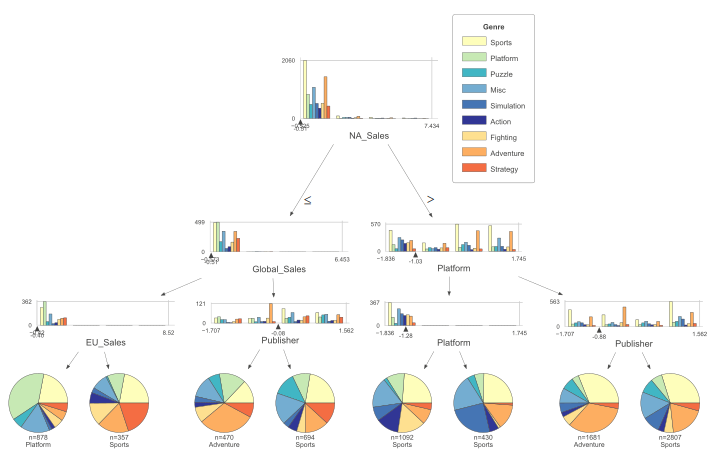

In [73]:
from dtreeviz.trees import *

viz = dtreeviz(clf,
               X_train,
               y_train.values,
               target_name='Genre',
               feature_names=list(X.columns),
               class_names=list(labels.unique()),
               histtype='bar', 
               orientation ='TD')
              
viz

In [74]:
#viz.svg()

In the figure above, the different classes are represented by a different colour. The entity distributions of all the different classes are represented in the starting node of the tree.

As we move down each branch, the algorithm then tries to better separate the different distributions using the function described under each of the node graphs.

The circles generated next to the distributions represent the number of elements correctly classified after following a certain node, the greater the number of elements, the larger the size of the circle.

### Decision Boundaries:
Decision limits are one of the simplest approaches to graphically understanding how a machine learning model makes its predictions. One of the easiest ways to plot decision boundaries in Python is to use Mlxtend.

This library can, in fact, be used to trace the decision boundaries of machine learning and deep learning models. Let’s see how to draw a decision boundary:

In [75]:
from mlxtend.plotting import plot_decision_regions 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [82]:
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

In [87]:
# fig = plt.figure(figsize=(10,8))

# labels = ['Logistic Regression','Random Forest','Naive Bayes','SVM']
# for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
#                          labels,
#                          itertools.product([0, 1], repeat=2)):

#     clf.fit(X_train,
#                y_train.values)
#     ax = plt.subplot(gs[grd[0], grd[1]])
#     fig = plot_decision_regions(X_train,y_train, clf=clf, legend=2)
#     plt.title(lab)

# plt.show()

### Artificial Neural Networks:
Another technique of data visualization for machine learning that can be very useful when creating new neural network architectures is to visualize their structure. This can be easily done using the ANN Visualiser:

In [96]:
# !pip install ann_visualizer
# !pip install tensorflow

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from ann_visualizer.visualize import ann_viz
from tensorflow import keras

model = Sequential()
model.add(Dense(units=4,activation='relu',
                  input_dim=7))
model.add(Dense(units=4,activation='sigmoid'))
model.add(Dense(units=2,activation='relu'))

In [99]:
# ann_viz(model, view=True, filename="example", title="Example ANN")

So these were the most important techniques of data visualization for machine learning.